# Diffusion Maps

*Reference: An Introduction to Diffusion Maps*

In [85]:
import genops
import numpy as np
from sklearn.decomposition import PCA, KernelPCA
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
from sklearn.metrics import pairwise_distances

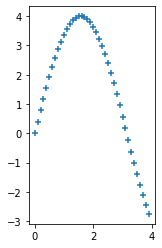

In [139]:
x0 = np.arange(0.0, 4.0, 0.1)
x1 = np.sin(x0) * 4
x = np.stack([x0, x1]).T

plt.scatter(x0, x1, marker='+')
plt.axis('scaled')
pass

In [178]:
P = np.exp(- pairwise_distances(x) ** 2 * 5)
P = P / P.sum(1, keepdims=True)

def pt(t):
    if t == 0:
        return P
    else:
        return P @ pt(t - 1)

diffusion 并不是越往后越好，它包含一个聚类的过程，其中的每个 t 都有意义。

随着 t 增加，揭露了**不同层次**的、从局部到整体的几何结构。

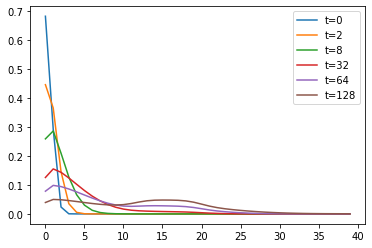

In [179]:
ts = [0, 2, 8, 32, 64, 128]
for t in ts:
    plt.plot(pt(t)[0])
plt.legend([f"t={t}" for t in ts])


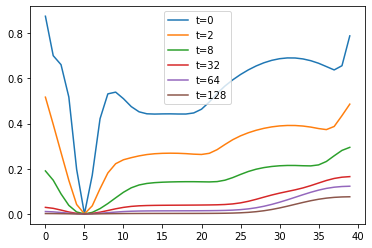

In [180]:
for t in ts:
    some_pt = pt(t)
    dist_from = ((some_pt - some_pt[5].reshape(1, -1)) ** 2).sum(1)
    plt.plot(dist_from)
plt.legend([f"t={t}" for t in ts])